In [18]:
# pip install tensorflow>=2.15.0 tqdm>=4.66

In [19]:
pip show torch

Name: torch
Version: 2.1.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/wangjz/miniforge3/envs/llm/lib/python3.9/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, torchaudio, torchvision
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/wangjz/miniforge3/envs/llm/lib/python3.9/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [21]:
import tensorflow as tsf
import tqdm
import warnings

warnings.filterwarnings("ignore")

print("Tensorflow version:", tsf.__version__)
print("tqdm version:",tqdm.__version__)

Tensorflow version: 2.19.0
tqdm version: 4.67.1


In [22]:
from gpt_download3 import download_and_load_gpt2

In [23]:
settings, params = download_and_load_gpt2(model_size="124M", models_dir="gpt2")

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


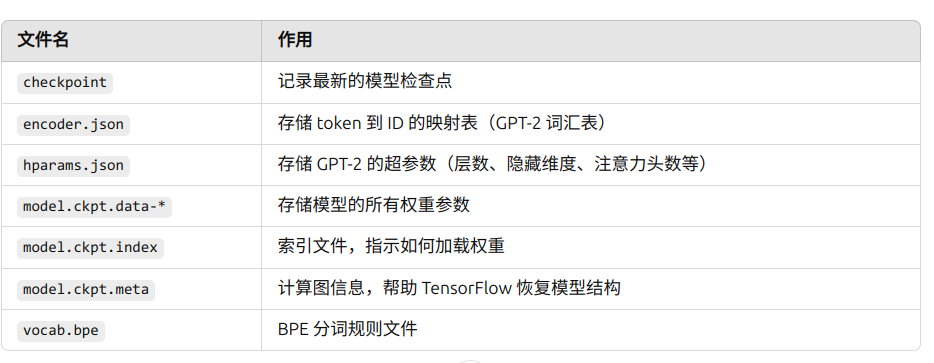

hparams.josn：存大模型的超u参数，GPT_CONF_124M

checkpoint: gpt2模型的权重

encoder.json：token -- tokenID

vocab.bpe：

In [24]:
print("Settings:", settings)
print("Parameter dictionary keys:", params.keys())

Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [25]:
print(params["wte"])
print("Token embedding weight tensor dimensions:", params["wte"].shape)

print("\n", params["wpe"])
print("Token embedding weight tensor dimensions:", params["wpe"].shape)

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]
Token embedding weight tensor dimensions: (50257, 768)

 [[-1.8820720e-02 -1.9741860e-01  4.0267250e-03 ... -4.3043736e-02
   2.8267192e-02  5.4490108e-02]
 [ 2.3959434e-02 -5.3792033e-02 -9.4878644e-02 ...  3.4170013e-02
   1.0171850e-02 -1.5572949e-04]
 [ 4.2160717e-03 -8.4763914e-02  5.4514930e-02 ...  1.9744711e-02
   1.9324856e-02 -2.1423856e-02]
 ...
 [-1.7986511e-03  1.6052092e-03 -5.5103153e-02 ...  1.3616630e-02
  -7.1805264e-03  3.7552188e-03]
 [ 3.2105497e-03  1.5500595e-03 -4.8944373e-02 ...

In [26]:
GPT_CONFIG_124M = {
        "vocab_size": 50257,    # 词汇个数
        "context_length": 256, # sample的长度
        "emb_dim": 768,         # 嵌入维度
        "n_heads": 12,          # 注意力头数
        "n_layers": 12,         # 层数
        "drop_rate": 0.1,       # 权重丢失率
        "qkv_bias": False       # Query-Key-Value偏执设置
    }

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

model_name = "gpt2-small (124M)"
NEW_CONF = GPT_CONFIG_124M.copy()
NEW_CONF.update(model_configs[model_name]) # 用于将另一个字典的键值对合并到当前字典中。若键已存在，则覆盖旧值；若不存在，则添加新键值对。

print(NEW_CONF)

{'vocab_size': 50257, 'context_length': 256, 'emb_dim': 768, 'n_heads': 12, 'n_layers': 12, 'drop_rate': 0.1, 'qkv_bias': False}


In [27]:
from test_diy.GPT2 import GPTModel
NEW_CONF.update({"context_length":1024, "qkv_bias":True})
gpt = GPTModel(NEW_CONF)
gpt.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiheadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiheadAttention(
        (W_query): Linear(in_features=7

In [28]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [29]:
def assign(left, right):
    if left.shape != right.shape:
       raise ValueError(f"Shape mismatch. Left:{left.shape}, Right:{right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

In [ ]:
import numpy as np

# GPT模型
def load_weights_into_gpt(gpt, params):
    # 词嵌入
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    # 位置嵌入
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])

    # Transfomer 模块
    for b in range(len(params["blocks"])):
        # 多头注意力模块 QVK
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)

        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)

        # 注意力模块attn后的输出映射层Proj，在残差前
        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight, 
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias, 
            params["blocks"][b]["attn"]["c_proj"]["b"])

        # FeedForward模块，有两层，分别有权重和偏置
        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight, 
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias, 
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight, 
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias, 
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        # 注意力模块attn和FF模块前都有LayNorm层，LN有scale和shift对应g和b
        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale, 
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift, 
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale, 
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift, 
            params["blocks"][b]["ln_2"]["b"])

    # 注意力整体模块后还有一个大LayerNorm层
    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    # 从词向量（768）转回token（50257）
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])
    
    # DropOut 和 ShortCut 不需要参数

In [31]:
load_weights_into_gpt(gpt, params)
gpt.to(device)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiheadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiheadAttention(
        (W_query): Linear(in_features=7

In [32]:
import tiktoken 
tokenizer = tiktoken.get_encoding('gpt2')

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # 变为batch
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # 变成context
    return tokenizer.decode(flat.tolist())

def generate(model, idx, max_new_tokens, context_size,
             temperature=0.0,
             top_k=None,
             eos_ids=None):
    for _ in range(max_new_tokens):
        idx_cond = idx[:,-context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:,-1,:] # （batch_size, context_length）

        if top_k is not None:
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(condition=logits<min_val,
                                 input=torch.tensor(float("-inf")).to(logits.device),
                                 other=logits)
        
        if temperature > 0.0:
            logits = logits / temperature
            probas = torch.softmax(logits, dim=-1)  # (batch_size, context_len)
            # 根据概率分布进行采样
            idx_next = torch.multinomial(probas, num_samples=1) # (batch_size, 1)

        else:
            idx = torch.argmax(logits, dim=-1, keepdim=True) # (batch_size, 1)
        
        if idx_next == eos_ids: # 停止符
            break

        idx = torch.cat((idx, idx_next), dim=-1) # (batch_sizr, num_tokens+1)

    return idx

In [33]:
print(NEW_CONF)

{'vocab_size': 50257, 'context_length': 1024, 'emb_dim': 768, 'n_heads': 12, 'n_layers': 12, 'drop_rate': 0.1, 'qkv_bias': True}


In [ ]:
torch.manual_seed(123)

token_ids = generate(
    model=gpt, 
    idx=text_to_token_ids("Every effort moves you", tokenizer).to(device),
    max_new_tokens=25,
    context_size=NEW_CONF["context_length"],
    top_k=50,
    temperature=1.5
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you the A the A,.
) (d that. - of have now
" it "an you may a I


: 